In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
import PIL
import PIL.Image

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def getFilesNewForY(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*Scene_classification*.tiff")
        file = files[0]
        #print(files)
        yield file

In [3]:
fileNamesY = list(getFilesNewForY("/tmp/shared/dataset4"))
fileNamesY

['/tmp/shared/dataset4/16/', '/tmp/shared/dataset4/21/', '/tmp/shared/dataset4/9/', '/tmp/shared/dataset4/13/', '/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/24/', '/tmp/shared/dataset4/17/', '/tmp/shared/dataset4/14/', '/tmp/shared/dataset4/11/', '/tmp/shared/dataset4/12/', '/tmp/shared/dataset4/15/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/23/', '/tmp/shared/dataset4/10/', '/tmp/shared/dataset4/22/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/26/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/19/', '/tmp/shared/dataset4/2/', '/tmp/shared/dataset4/20/', '/tmp/shared/dataset4/25/', '/tmp/shared/dataset4/18/', '/tmp/shared/dataset4/27/']


['/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/21/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/13/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/24/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/17/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/14/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/11/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/12/2022-08-25-00

In [4]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [5]:
fileNamesX = list(getFilesNew("/tmp/shared/dataset4"))
fileNamesX

['/tmp/shared/dataset4/16/', '/tmp/shared/dataset4/21/', '/tmp/shared/dataset4/9/', '/tmp/shared/dataset4/13/', '/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/24/', '/tmp/shared/dataset4/17/', '/tmp/shared/dataset4/14/', '/tmp/shared/dataset4/11/', '/tmp/shared/dataset4/12/', '/tmp/shared/dataset4/15/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/23/', '/tmp/shared/dataset4/10/', '/tmp/shared/dataset4/22/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/26/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/19/', '/tmp/shared/dataset4/2/', '/tmp/shared/dataset4/20/', '/tmp/shared/dataset4/25/', '/tmp/shared/dataset4/18/', '/tmp/shared/dataset4/27/']


[['/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-

In [6]:
fileNameTest = fileNamesX[0][0]
pic = PIL.Image.open(str(fileNameTest))
imageData = np.asarray(pic.getdata())
print("Min value ", np.min(imageData), " max value ", np.max(imageData))
imageData.shape

Min value  nan  max value  nan


(878787,)

In [7]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                ff = f.read(1)
                ff = ff[0:608, 0: 1024]
                s.append(ff)
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [8]:
filesX_array = getFilesArrayNew(fileNamesX)
#filesX_array = filesX_array / np.max(filesX_array)
#std = np.std(filesX_array)
#mean= np.mean(filesX_array)
#
#filesX_array-=mean
#filesX_array/=std

In [9]:
print("Min value: ", np.min(filesX_array), " max value: ", np.max(filesX_array))

Min value:  0.0  max value:  2.1167


In [10]:
def getFilesArrayNewY(paths):
    l = []
    for i in paths:
        with rio.open(i,'r') as f:
            r = f.read(1)
            g = f.read(2)
            b =  f.read(3)
            r = r[0:608, 0:1024]
            g = g[0:608, 0:1024]
            b = b[0:608, 0:1024]
            rgb_arr = [r, g ,b]
            l.append(rgb_arr)
            # l.append(rgb)
    return l

In [11]:
_filexY_array = np.asarray(getFilesArrayNewY(fileNamesY))
#_filexY_array = np.moveaxis(_filexY_array, 1,0)
_filexY_array = np.asarray(_filexY_array * 255).astype(int)
_filexY_array.shape

(27, 3, 608, 1024)

In [12]:
__filesY_array  = []
for i in _filexY_array:
    r = i[0]
    g = i[1]
    b = i[2]
    rgb  = r
    rgb = np.left_shift(rgb, 8) + g
    rgb = np.left_shift(rgb, 8) + b
    __filesY_array.append(rgb)

In [13]:
filexY_array = np.asarray(__filesY_array)
filexY_array.shape

(27, 608, 1024)

In [14]:
unique_valsY = np.unique(filexY_array)
print(unique_valsY)
#filexY_array[filexY_array == 1] = 100

[       0      255    40960  3092271  6566400  6605055  8421504 12632256
 16750335 16770650 16777215]


<p color="#000000"> Category 1 </p>
<p color="#0000ff"> Category 2 </p>
<p color="#00a000"> Category 3 </p>
<p color="#643200"> Category 4 </p>
<p color="#64C8FF"> Category 5 </p>
<p color="#808080"> Category 6 </p>
<p color="#C0C0C0"> Category 7 </p>
<p color="#FFE65A"> Category 8 </p>
<p color="#FFFFFF"> Category 9 </p>


In [15]:
num_of_y = filexY_array.shape[0]*filexY_array.shape[1]*filexY_array.shape[2]
cat1_c = np.count_nonzero(filexY_array == 0)
cat2_c = np.count_nonzero(filexY_array == 255)
cat3_c = np.count_nonzero(filexY_array == 40960)
cat4_c = np.count_nonzero(filexY_array == 6566400)
cat5_c = np.count_nonzero(filexY_array == 6605055)
cat6_c = np.count_nonzero(filexY_array == 8421504)
cat7_c = np.count_nonzero(filexY_array == 12632256)
cat8_c = np.count_nonzero(filexY_array == 16770650)
cat9_c = np.count_nonzero(filexY_array == 16777215)
cat_all = []
for idx, num in enumerate(unique_valsY):
    cnt = np.count_nonzero(filexY_array == num)
    print("category " + str(idx) + " count " + str(cnt))
    cat_all.append(cnt)


category 0 count 120
category 1 count 735271
category 2 count 7210430
category 3 count 46938
category 4 count 26247
category 5 count 516150
category 6 count 5110
category 7 count 118567
category 8 count 35
category 9 count 8143733
category 10 count 7383


In [16]:
for idx, i in enumerate(unique_valsY):
        filexY_array [ filexY_array == i] = idx

In [17]:
# print(np.unique(filexY_array))

In [18]:
filexY_array [ filexY_array == 3] = 0
filexY_array [ filexY_array == 4] = 0
#filexY_array [ filexY_array == 5] = 0
filexY_array [ filexY_array == 6] = 0
filexY_array [ filexY_array == 7] = 0
filexY_array [ filexY_array == 8] = 0
filexY_array [ filexY_array == 10] = 0


In [19]:
print(np.unique(filexY_array))

[0 1 2 5 9]


In [20]:
filexY_array [ filexY_array == 5] = 3
filexY_array [ filexY_array == 9] = 4


(array([ 204400.,       0.,  735271.,       0.,       0., 7210430.,
              0.,  516150.,       0., 8143733.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

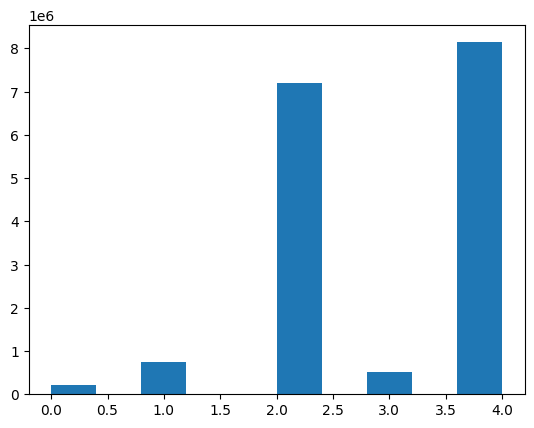

In [21]:
plt.hist(filexY_array.reshape(-1))

In [22]:
x_np = np.asarray(filesX_array)
x_np.shape

(27, 12, 608, 1024)

In [23]:
x_np2 = x_np[:,:,0:608,0:1024]
x_np2.shape

(27, 12, 608, 1024)

In [24]:
x_np2 = np.moveaxis(x_np2,1,0)
x_np2.shape

(12, 27, 608, 1024)

In [25]:
x_np_combined = x_np2.reshape(12,-1,1024)
x_np_combined.shape

(12, 16416, 1024)

In [26]:
x_np_combined.shape

(12, 16416, 1024)

In [27]:
x_np_combined = np.moveaxis(x_np_combined, 0, -1)
x_np_combined.shape

(16416, 1024, 12)

In [28]:
x_data = x_np_combined.reshape(-1,32,32,12)

In [29]:
x_data.shape

(16416, 32, 32, 12)

In [30]:
x_data_summed = np.sum(x_data, axis=3)
x_data_summed.shape

(16416, 32, 32)

In [31]:
filexY_array.shape

(27, 608, 1024)

In [32]:
y_np =  filexY_array[:,0:608,0:1024]
y_np.shape

(27, 608, 1024)

In [33]:
y_np2 = y_np.reshape(-1, 1024)
y_np2.shape

(16416, 1024)

In [34]:
y_data = y_np2.reshape(-1, 32,32)
y_data.shape

(16416, 32, 32)

In [35]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
y_cat = np_utils.to_categorical(y_data)

In [37]:
model_new = tf.keras.models.Sequential([
    #BatchNormalization(input_shape=(32,32,12)),
    Conv2D(32,3,padding='same',input_shape=(32,32,12)),
    BatchNormalization(),
    #Conv2D(32,3,padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.5),


    Conv2D(64,3, padding='same'),
    BatchNormalization(),
    #Conv2D(64,3, padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    #Dropout(0.5),
    #BatchNormalization(),

    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    # Conv2D(128,3, padding='same'),
    # Conv2D(128,3, padding='same'),
    # Activation('relu'),
    # MaxPooling2D(pool_size=(2,2)),
    # Dropout(0.5),
    #BatchNormalization(),
    # Flatten(),
    # Dense(512),
    # Dense(1024),
    # Dense(2048),
    # Activation('relu'),
    # Dropout(0.7),
    # Reshape((4,4,128)),
    #Dense(64),
    # Dense(128),
    #Dense(64),
    # Dropout(0.5),
    Dense(5),
    #Dense(64),
    # Dense(128),
    # Dropout(0.5),
    #BatchNormalization(),
    #Activation('relu'),
    #Dense(256),
    #Dense(128),
    #Activation('relu'),
    #Dropout(0.7),
    #Reshape((4,4,128)),
    # UpSampling2D((2,2)),
    # Conv2D(128,3, padding='same'),
    # Conv2D(128,3, padding='same'),
    # Activation('relu'),
    UpSampling2D((2,2)),
    #Dropout(0.5),
    #BatchNormalization(),
    Conv2D(64,3, padding='same'),
    BatchNormalization(),
    #Conv2D(64,3, padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    #Dropout(0.5),
    #BatchNormalization(),
    Conv2D(32,3, padding='same'),
    BatchNormalization(),
    #Conv2D(32,3, padding='same'),
    Activation('relu'),
    Conv2D(5,3,padding='same'),
    #Dropout(0.6),
    #BatchNormalization(),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Activation('softmax'),
])

2022-12-31 08:53:31.702573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-31 08:53:31.774126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-31 08:53:31.774475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-31 08:53:31.775837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [38]:
model_new.compile(loss="sparse_categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [39]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [40]:
es = EarlyStopping(monitor='val_loss')
mc = ModelCheckpoint('best_model_new.h5', monitor='val_loss')
cb = [es,mc]

In [41]:
history2 = model_new.fit(x_data, y_data, epochs=150,batch_size=32, validation_split=0.2)

Epoch 1/150


2022-12-31 08:53:42.557313: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


411/411 [==============================] - 13s 15ms/step - loss: 0.4390 - accuracy: 0.8216 - val_loss: 0.9721 - val_accuracy: 0.7119
Epoch 2/150
411/411 [==============================] - 5s 13ms/step - loss: 0.3333 - accuracy: 0.8650 - val_loss: 0.4746 - val_accuracy: 0.8147
Epoch 3/150
411/411 [==============================] - 5s 13ms/step - loss: 0.3008 - accuracy: 0.8794 - val_loss: 0.5135 - val_accuracy: 0.8082
Epoch 4/150
411/411 [==============================] - 5s 13ms/step - loss: 0.2799 - accuracy: 0.8885 - val_loss: 0.5440 - val_accuracy: 0.8114
Epoch 5/150
411/411 [==============================] - 5s 13ms/step - loss: 0.2691 - accuracy: 0.8929 - val_loss: 0.4475 - val_accuracy: 0.8327
Epoch 6/150
135/411 [========>.....................] - ETA: 3s - loss: 0.2611 - accuracy: 0.8964

KeyboardInterrupt: 

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [ ]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/dataset4/2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [ ]:
l.shape

In [ ]:
arr_st = np.stack(l)
# std2 = np.std(arr_st)
# mean2= np.mean(arr_st)
#
# arr_st-=mean2
# arr_st/=std2
#arr_st = arr_st / np.max(filesX_array)

In [ ]:
arr_st.shape

In [ ]:
print("Min " , np.min(arr_st), " and max ", np.max(arr_st))

In [ ]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

In [ ]:
x1_v = x.shape[0]%32
x1_h = x.shape[1]%32
res1 = x.shape[0]-x1_v
res2 = x.shape[1]-x1_h
xx = x[0:608,0:1024,:]

In [ ]:
x_rr = xx.reshape(-1, 32,32,12)

In [43]:
def createImageCubes(img_array, blk_width,blk_height):
    arrray = []
    imageShape = img_array.shape
    for w in range(0,imageShape[0],blk_width):
        for h in range(0, imageShape[1], blk_height):
            arrr = img_array[w:w+blk_width,h:h+blk_height,:]
            arrray.append(np.asarray(arrr))
    return np.asarray(arrray)

In [66]:
def imageFromCube(cubes, imageWidth, imageHeight):
    arrrr = np.empty((imageWidth, imageHeight,12))
    cubesShape = cubes.shape
    items_per_row = int(imageWidth/cubesShape[1])
    items_per_col = int(imageHeight/cubesShape[2])
    for el in range(0,cubesShape[0]):
        num_row = int(el/items_per_col)
        num_col = int(el%items_per_col)
        #print("Row: ", num_row, " column: ", num_col)
        for i in range(0,cubesShape[1]):
            for j in range(0, cubesShape[2]):
                x = int(i+num_row*cubesShape[1])
                y = int(j+num_col*cubesShape[2])
                #print("X: ", x, " Y: ", y)
                arrrr[x,y] = cubes[el,i,j,:]
        #arrrr[num_row, num_col] = cubes[el,:, :, :]
        #num_col = int(int(el*cubesShape[1]%imageWidth)/imageHeight)
    return arrrr

In [56]:
x_r_new = x_np[4]
x_r_new = x_r_new[:,0:608,0:1024]
x_r_new2 = np.moveaxis(x_r_new, 0, -1)
print("Shape of array: ", x_r_new2.shape)
#x_r_new2 = x_r_new.reshape(-1, 32,32,12)
x_r_new3 = createImageCubes(x_r_new2,32,32)
x_r_new3.shape
print("Value: ", x_r_new2[63,0,0], " and splitted ", x_r_new3[0,31,31,0])

Shape of array:  (608, 1024, 12)
Value:  0.0221  and splitted  0.0195


In [57]:
x_r_testt3 = x_r_new3[607,:,:,1]
x_r_testt3.shape
# ep.plot_bands(x_r_testt3,
#               cmap=ListedColormap(['black', 'purple','blue', 'orange']))
# print("Transformed value: ",x_r_new2[0,0,0,0],"and original", x_r_new[1,0,0] )

(32, 32)

In [67]:
x_r_test4 = imageFromCube(x_r_new3, 608, 1024)
x_r_test4.shape

(608, 1024, 12)

In [48]:
x_r_ttest = x_r_new[1]
x_r_ttest.shape

(608, 1024)

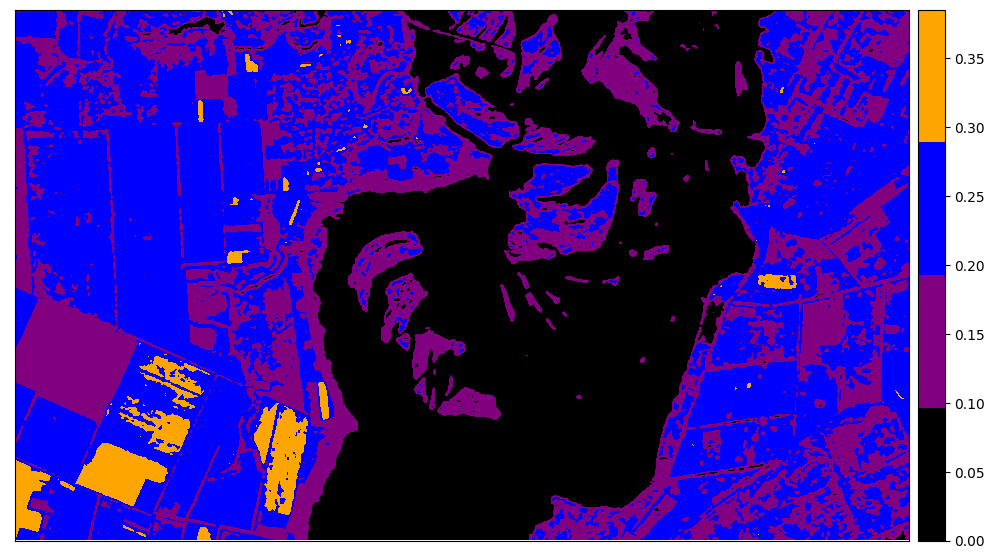

<AxesSubplot:>

In [68]:
ep.plot_bands(x_r_test4[:,:,1],
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

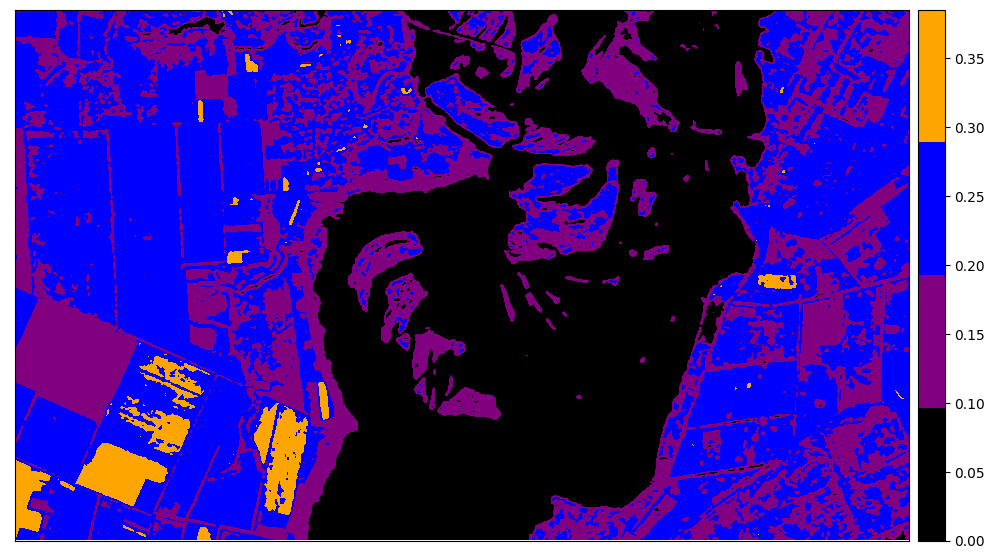

<AxesSubplot:>

In [50]:
ep.plot_bands(x_r_new2[:,:,1],
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [ ]:
x_r_ttest2 = x_r_new2
x_r_ttest2 = x_r_ttest2[:,:,:,1]
x_r_ttest2 = x_r_ttest2.reshape(608,1024)

In [ ]:
ep.plot_bands(x_r_ttest2,
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [ ]:
prediction = model_new.predict(x_r_new2,batch_size=32)

In [ ]:
print("Min percentage: ", np.min(prediction), " max percentage: ", np.max(prediction), " shape: ", prediction.shape)

In [ ]:
pred_cat = np.argmax(prediction,axis=-1)
pred_cat.shape

In [ ]:
pp = np.expand_dims(pred_cat, axis=-1)

In [ ]:
pred_pxl = pred_cat.reshape(608,1024)

In [ ]:
pred_pxl.shape

In [ ]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [ ]:
Check_images = glob("/tmp/shared/dataset4/2/*Scen*.tiff")
Check_images

In [ ]:
from IPython.display import Image
PIL.Image.open(str(Check_images[0]))

In [ ]:
# import cv2
#
# gray = cv2.imread("path/to/tiff/0.tiff", cv2.IMREAD_UNCHANGED)
#
# cv2.namedWindow("MyImage", cv2.WINDOW_NORMAL)
# cv2.imshow("MyImage", gray)
# cv2.waitKey(0)

In [ ]:
item = y_np[4]
item.shape

In [ ]:
ep.plot_bands(item,
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [ ]:
accuracy_score(pred_cat.reshape(-1), item.reshape(-1))

(array([6.10000e+01, 0.00000e+00, 1.99572e+05, 0.00000e+00, 0.00000e+00,
        1.65659e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.57300e+05]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

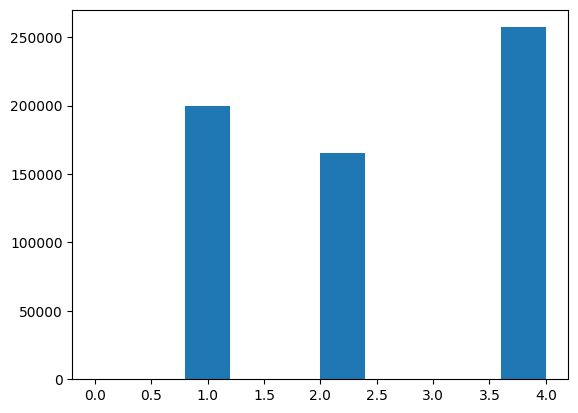

In [231]:
plt.hist(item.reshape(-1))

(array([ 19610.,      0., 369267.,      0.,      0.,    899.,      0.,
           861.,      0., 231955.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

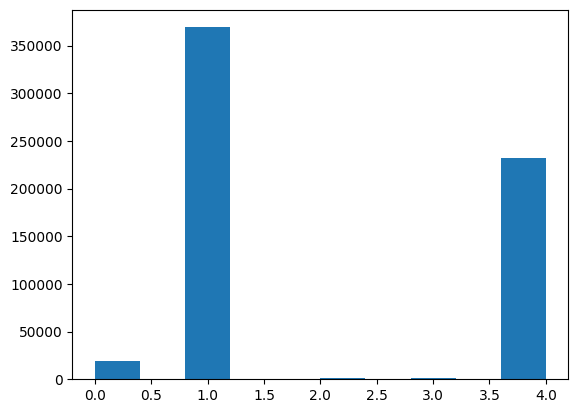

In [232]:
plt.hist(pred_cat.reshape(-1))